In [3]:
import sys
sys.path.append("..")

# from diffusion.heston_process import simulate_heston
from pricing.option_heston import option_heston
from pricing.option_bsm import option_european_bsm
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
mpl.rc("savefig", dpi=200)
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log, sqrt, pi

In [109]:
def simulate_gbmj(S, maturity, steps, lambda_, sigma_y_, sigma_, mu_y_, mu_star): 
    dt = maturity/steps
    M_simul = np.zeros(steps)
    jumps = np.zeros(steps)
    M_simul[0] = S
    for i in np.arange(1, steps):
        jumpnb = np.random.poisson( lambda_*dt, size=1)
        jump = np.random.normal(mu_y_ * ( jumpnb - lambda_ * dt ), sqrt( jumpnb ) * sigma_y_, size=1)
        jumps[i] = jump
        M_simul[i] = M_simul[i-1] * np.exp(mu_star * dt + sigma_ * sqrt( dt )* np.random.normal(0, 1, 1) + jump) 
    return jumps, M_simul

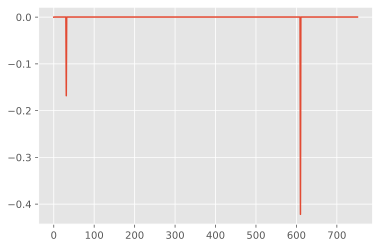

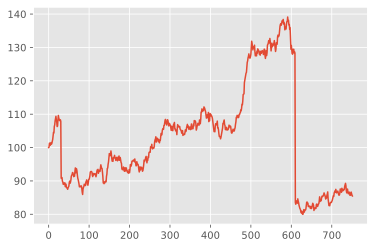

In [125]:
maturity=1
steps=752
lambda_ = 0.9; sigma_y_ = 0.3; sigma_ = 0.2;
mu_y_ = -0.2; mu_star = 0.02; S = 100;
M_simul,jumps = simulate_gbmj(S, maturity, steps, lambda_, sigma_y_, sigma_, mu_y_, mu_star)
plt.plot(M_simul)
plt.show()
plt.plot(jumps)
plt.show()

Text(0.5, 1.0, 'Jump Diffusion Process')

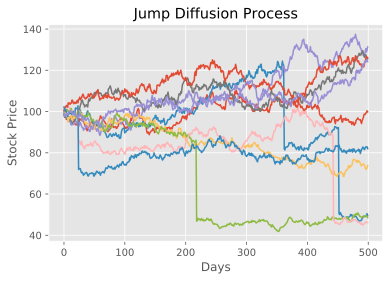

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt + sigma*np.sqrt(dt) * np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = -0.2 # meean of jump size
v = 0.3 # standard deviation of jump
lam =0.5 # intensity of jump i.e. number of jumps per annum
steps =500 # time steps
Npaths = 10 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

In [20]:
def merton_call_simulation(S0,sig, tau,r,lam,mu_y,sig_y):
    nsim=1000
    k=math.exp(mu_y+0.5*sig_y*sig_y)-1
    price=0.0
    price_path = []
    for i in range(nsim):
        jump_N=np.random.poisson(lam*tau)
        jump_normal=np.random.normal(mu_y,sig_y,jump_N)
        jump_sum=np.sum(jump_normal)
        S_tau=S0*math.exp((r-lam*k-0.5*sig*sig)*tau+sig*np.random.normal(0,math.sqrt(tau))+jump_sum)
        price_path.append(S_tau)
    return price_path

In [ ]:
merton_call_simulation(S0=100,sig=sigma, tau=T/steps, r=r, lam=lam, mu_y,sig_y)

In [63]:
import QuantLib as ql
from diffusion.gbm_process import simulate_gbm

# Setting evaluation date
today = ql.Date(7,3,2021)
no_of_timestep = 100
N=1000
maturity = 20
# Define evaluation grid
# date_grid = [today + ql.Period(i,ql.Months) for i in range(0,no_of_timestep)]
daily = [today + ql.Period(i,ql.Days) for i in range(0,365)]
weekly = [daily[-1] + ql.Period(i,ql.Weeks) for i in range(0,25)]
monthly = [weekly[-1] + ql.Period(i,ql.Weeks) for i in range(0,12)]
yearly = [monthly[-1] + ql.Period(i,ql.Years) for i in range(0,20)]
date_grid = [*daily, *weekly, *monthly, *yearly]

time_grid = np.vectorize(lambda x: ql.ActualActual().yearFraction(today, x))(date_grid)
dt = time_grid[1:] - time_grid[:-1]
maturity = time_grid[-1]
maturity_date = date_grid[-1]


df_spot = simulate_gbm(100, daily, 10, {'mu': 0.1, 'sigma': 0.3})


Text(0.5, 1.0, 'GBM with jumps')

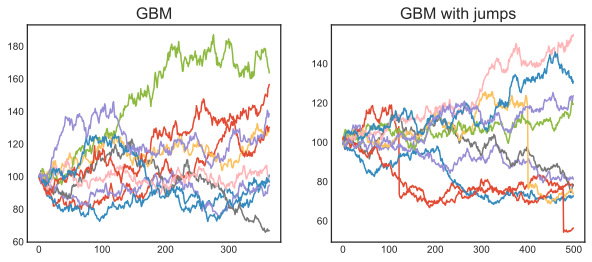

In [81]:
plt.style.use('seaborn-white')
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(df_spot.values)
axes[0].set_title('GBM', fontsize=16)

axes[1].plot(j)
axes[1].set_title('GBM with jumps', fontsize=16)